In [7]:
# KNN으로 이미지 분류기 생성하고 검증해보기 
# 아래 깃헙 코드 카피함
# https://github.com/MahanFathi/CS231/blob/master/assignment1/knn.ipynb

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# CIFAR-10 데이터를 다운로드 받기 위한 keras의 helper 함수인 load_data 함수를 임포트합니다.
from tensorflow.keras.datasets.cifar10 import load_data


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [21]:
# Load the raw CIFAR-10 Data
(x_train, y_train), (x_test, y_test) = load_data() #x는 data, y는 label을 의미 

# train.shape => (데이터수, 1차원(=가로), 2차원(=세로), 3차원(=RGB))
print('Training data shape: ', x_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', x_test.shape)
print('Test labels shape: ', y_test.shape)


Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

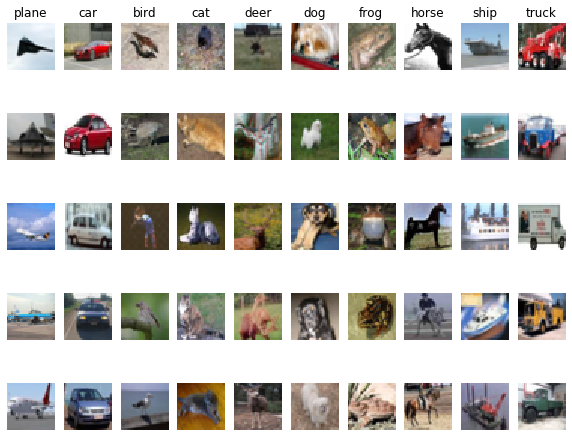

In [31]:
# 픽셀값으로 이루어진 dataset 중 일부만 추출해 우리가 이해할 수 있는 이미지로 시각화하자. 
# plt.imshow() 가 픽셀을 이미지로 시각화한다. 

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
sample_per_class = 5
for y, cls in enumerate(classes):
    # y에 해당하는 클래스의 인덱스 반환. 
    # 각 훈련셋마다 50000개 개체가 있을테니, 0~49999 배열 반환함
    idxs = np.flatnonzero(y_train == y)
    
    # 50000개에서 sample 갯수인 5개를 중복없이 추출 
    idxs = np.random.choice(idxs, sample_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1 
        plt.subplot(sample_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


In [35]:
# 효율을 위해 5000개만 추출해 훈련데이터셋으로 활용 
num_training = 5000
mask = list(range(num_training))
X_train = x_train[mask]
Y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = x_test[mask]
y_test = y_train[mask]

In [48]:
# 3차원 배열을 1차원으로 바꾼다. 1열로 쭉 세워 계산 효율을 높이는 듯
# 각 개체가 32 * 32 * 3 이었으니 3072의 원소로 변환됨 
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)
